In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = "Malgun Gothic"

In [3]:
from datetime import datetime

In [4]:
import plotly.express as px

In [5]:
dt1 = pd.read_csv('log_order.csv')
dt2 = pd.read_csv('master_member.csv')
dt3 = pd.read_csv('master_product.csv')

In [6]:
dt1.isnull().sum()

결제수단              0
공급원가             88
교환구분              0
네이버 포인트           0
배송번호              0
배송비 정보            0
배송시작일             0
배송완료일             0
사용한 적립금액          0
상품구매금액            0
상품명              88
상품번호             88
상품별 추가할인금액        0
수량                0
수령인 주소            8
주문 시 회원등급      3105
주문경로              0
주문번호              0
주문일시              0
주문자ID          3105
카드사           30138
쿠폰 할인금액           0
판매가               0
품목번호              0
dtype: int64

In [7]:
dt1[dt1['카드사'].isna()]['결제수단'].unique()

array(['무통장입금', '적립금,무통장입금', '적립금', '휴대폰', '적립금,가상계좌', '가상계좌', '예치금',
       '예치금,적립금,무통장입금', '쿠폰,무통장입금', '페이나우(실시간 계좌이체)', '예치금,무통장입금',
       '실시간계좌이체', '예치금,쿠폰,무통장입금', '카카오페이(카카오머니)', '적립금,카카오페이(카카오머니)',
       '쿠폰,예치금', '쿠폰,가상계좌', '적립금,페이나우(실시간 계좌이체)', '에스크로(실시간계좌이체)',
       '쿠폰,휴대폰', '적립금,휴대폰', '쿠폰,에스크로(실시간계좌이체)', '무통장입금,휴대폰',
       '무통장입금,실시간계좌이체', '예치금,휴대폰', '적립금,실시간계좌이체', '에스크로(가상계좌)',
       '예치금,실시간계좌이체'], dtype=object)

In [8]:
dt1[dt1['수령인 주소'].isna()]

,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,...,수령인 주소,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호
2815,무통장입금,37400.0,교환안함,0,D-20190128-0000102-00,무료,2019-01-29 오전 8:45,2019-02-02 오전 5:32,0,58410,...,NaN,사업자,PC쇼핑몰,20190128-0000102,2019-01-28 오전 9:03,kang701211,NaN,0,58410,49413
21847,무통장입금,12650.0,교환안함,0,D-20180514-0000232-00,무료,2018-05-17 오후 1:29,2018-05-21 오전 5:32,0,30840,...,NaN,사업자,모바일웹,20180514-0000232,2018-05-14 오전 11:16,toristar3,NaN,0,30840,9723
37413,무통장입금,75680.0,교환안함,0,D-20181104-0000028-00,무료,2018-11-06 오후 6:45,2018-11-10 오전 5:32,0,118140,...,NaN,일반,모바일웹,20181104-0000028,2018-11-04 오전 11:38,kang701211,NaN,0,118140,32272
37414,무통장입금,37400.0,교환안함,0,D-20181104-0000028-01,무료,2018-11-05 오후 6:15,2018-11-09 오전 5:32,0,58410,...,NaN,일반,모바일웹,20181104-0000028,2018-11-04 오전 11:38,kang701211,NaN,0,58410,32273
37415,무통장입금,0.0,교환안함,0,D-20181104-0000028-00,무료,2018-11-05 오후 6:15,2018-11-09 오전 5:32,0,0,...,NaN,일반,모바일웹,20181104-0000028,2018-11-04 오전 11:38,kang701211,NaN,0,0,32275
46435,카드,49500.0,교환안함,0,D-20171129-0000016-00,무료,2017-11-29 오후 5:34,2017-12-03 오전 5:38,0,79200,...,NaN,일반,모바일웹,20171129-0000016,2017-11-29 오전 12:45,qsd681,신한(구.LG카드 포함),0,79200,2513
46436,카드,56100.0,교환안함,0,D-20171129-0000016-01,무료,2017-11-29 오후 5:34,2017-12-03 오전 5:38,0,86240,...,NaN,일반,모바일웹,20171129-0000016,2017-11-29 오전 12:45,qsd681,신한(구.LG카드 포함),0,86240,2514
46437,카드,36300.0,교환안함,0,D-20171129-0000016-02,무료,2017-11-29 오후 5:34,2017-12-03 오전 5:38,0,56100,...,NaN,일반,모바일웹,20171129-0000016,2017-11-29 오전 12:45,qsd681,신한(구.LG카드 포함),0,56100,2515


In [9]:
dt2[dt2['사용가능 적립금'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 0 to 6560
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         1989 non-null   object
 1   나이         1989 non-null   int64 
 2   사용가능 적립금   1989 non-null   int64 
 3   성별         1989 non-null   object
 4   주소(동/읍/면)  1921 non-null   object
 5   최종접속일      1956 non-null   object
 6   최종주문일      1824 non-null   object
 7   유입경로       1989 non-null   object
 8   유입기기       1989 non-null   object
 9   회원 가입일     1989 non-null   object
 10  사업자구분      1989 non-null   object
 11  회원구분       1989 non-null   object
dtypes: int64(2), object(10)
memory usage: 202.0+ KB


In [10]:
dt2[dt2['사용가능 적립금'] == 0]['사업자구분'].unique()

array(['개인', '사업자'], dtype=object)

In [11]:
dt2['사업자구분'].unique()

array(['개인', '사업자', '외국인'], dtype=object)

In [12]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         6575 non-null   object
 1   나이         6575 non-null   int64 
 2   사용가능 적립금   6575 non-null   int64 
 3   성별         6575 non-null   object
 4   주소(동/읍/면)  5941 non-null   object
 5   최종접속일      6523 non-null   object
 6   최종주문일      5153 non-null   object
 7   유입경로       6575 non-null   object
 8   유입기기       6575 non-null   object
 9   회원 가입일     6575 non-null   object
 10  사업자구분      6575 non-null   object
 11  회원구분       6575 non-null   object
dtypes: int64(2), object(10)
memory usage: 616.5+ KB


In [13]:
df = dt1.merge(dt2, how='left', left_on='주문자ID', right_on='ID')

In [14]:
df.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', 'ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일',
       '유입경로', '유입기기', '회원 가입일', '사업자구분', '회원구분'],
      dtype='object')

In [15]:
df[df['주소(동/읍/면)'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3503 entries, 2 to 46747
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   결제수단        3503 non-null   object 
 1   공급원가        3460 non-null   float64
 2   교환구분        3503 non-null   object 
 3   네이버 포인트     3503 non-null   int64  
 4   배송번호        3503 non-null   object 
 5   배송비 정보      3503 non-null   object 
 6   배송시작일       3503 non-null   object 
 7   배송완료일       3503 non-null   object 
 8   사용한 적립금액    3503 non-null   int64  
 9   상품구매금액      3503 non-null   int64  
 10  상품명         3460 non-null   object 
 11  상품번호        3460 non-null   float64
 12  상품별 추가할인금액  3503 non-null   int64  
 13  수량          3503 non-null   int64  
 14  수령인 주소      3495 non-null   object 
 15  주문 시 회원등급   398 non-null    object 
 16  주문경로        3503 non-null   object 
 17  주문번호        3503 non-null   object 
 18  주문일시        3503 non-null   object 
 19  주문자ID       398 non-null  

In [16]:
dt1_cnt=dt1.groupby('주문자ID', as_index=False)[['주문일시']].count()

In [17]:
dt1_cnt['주문일시'].unique()

array([  1,  45,   3,   2,   4,   8,   9,  66,   7,   6,  13,   5,  11,
        12,  20,  10,  56,  26,  14,  24,  33,  21,  53,  37,  64,  40,
        73,  31,  19,  29,  16,  17,  27,  32, 152,  43,  15,  50,  22,
        23,  60,  94,  39,  28,  74,  58,  65,  25,  35,  18,  52,  46,
       267,  87,  99,  54,  30,  34,  67,  57,  55,  47,  79,  41, 114,
       197,  48,  44,  42,  59, 172, 126,  75, 105,  96,  63,  51,  83,
        80,  49,  72,  36, 251,  70, 145,  82, 232, 129,  77,  76, 295,
        38,  61,  81,  90,  84,  98, 119,  68, 214, 132, 103,  69, 118,
       115, 108,  88, 135, 163,  86,  62], dtype=int64)

In [18]:
dt1 = dt1.drop('교환구분', axis=1)

In [19]:
dt2['유입경로'].unique()

array(['블로그광고', '이메일광고', 'SNS광고', '인터넷기사광고', '카카오톡광고', '신문광고', '기타',
       '지인추천', '잡지광고', '인터넷검색', '전단지광고', '유튜브광고'], dtype=object)

In [20]:
dt2[(dt2['유입경로'] == '신문광고') | (dt2['유입경로'] == '지인추천') | (dt2['유입경로'] == '잡지광고') | (dt2['유입경로'] == '전단지광고')]

,ID,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분
26,kyen1311,69,5820,여자,충청북도 청주시 서원구 남이면 가마3길 48,2019-03-24 오후 11:32,2019-03-24 오후 11:37,신문광고,PC,2017-03-03,사업자,사업자
38,deadand,37,0,남자,대구광역시 동구 첨단로8길 10 (신서동),2017-07-05 오후 2:19,2017-06-19 오후 7:56,신문광고,PC,2017-03-23,사업자,사업자
42,jjamno1004,38,0,여자,광주광역시 서구 운천로 54 (금호동),2017-03-26 오전 8:14,NaN,신문광고,PC,2017-03-26,사업자,사업자
113,yskim2937,75,1400,남자,서울특별시 관악구 신림로11길 51 (신림동),2018-02-06 오후 2:10,2018-01-18 오전 11:57,신문광고,모바일,2017-05-11,개인,일반
343,jogoya,38,600,남자,제주특별자치도 제주시 남광북3길 7 (이도이동),2019-03-03 오후 12:54,2019-03-03 오후 12:55,신문광고,PC,2017-10-27,개인,사업자
...,...,...,...,...,...,...,...,...,...,...,...,...
6551,pme1024,46,1000,남자,전라남도 순천시 연향상가길 17 (연향동),2019-05-31 오전 8:58,NaN,전단지광고,모바일,2019-05-29,사업자,일반
6554,seb0720,47,1000,남자,경기도 양주시 백석읍 꿈나무로 291,2019-05-29 오전 12:21,NaN,지인추천,모바일,2019-05-29,개인,일반
6559,kms9554,47,1000,남자,부산광역시 강서구 명지오션시티7로 41-10 (명지동),2019-05-30 오후 5:23,NaN,전단지광고,모바일,2019-05-30,사업자,일반
6565,wjdtnsghhh,47,1000,남자,강원도 원주시 호저면 만종리 597,2019-05-30 오전 10:15,NaN,전단지광고,PC,2019-05-30,사업자,일반


In [21]:
dt1['주문일시'] = dt1['주문일시'].apply(lambda x: x.replace('오전', 'am').replace('오후', 'pm'))
dt1['주문일시'] = pd.to_datetime(dt1['주문일시'], format = '%Y-%m-%d %p %I:%M')
dt1['주문일시']

0       2018-12-27 14:54:00
1       2018-12-29 13:22:00
2       2018-12-30 15:15:00
3       2018-12-31 10:30:00
4       2018-12-31 10:43:00
                ...        
46744   2017-12-29 13:39:00
46745   2017-12-29 17:16:00
46746   2017-12-30 18:56:00
46747   2017-12-31 10:00:00
46748   2017-12-31 18:15:00
Name: 주문일시, Length: 46749, dtype: datetime64[ns]

In [22]:
dt1['배송시작일'] = dt1['배송시작일'].apply(lambda x: x.replace('오전', 'am').replace('오후', 'pm'))
dt1['배송시작일'] = pd.to_datetime(dt1['배송시작일'], format = '%Y-%m-%d %p %I:%M')
dt1['배송시작일']

0       2019-01-07 08:56:00
1       2019-01-03 09:30:00
2       2019-01-03 09:30:00
3       2019-01-03 09:30:00
4       2019-01-07 08:56:00
                ...        
46744   2017-12-29 16:32:00
46745   2018-01-03 09:45:00
46746   2018-01-02 19:06:00
46747   2018-01-03 14:00:00
46748   2018-01-03 12:43:00
Name: 배송시작일, Length: 46749, dtype: datetime64[ns]

In [23]:
dt1['배송완료일'] = dt1['배송완료일'].apply(lambda x: x.replace('오전', 'am').replace('오후', 'pm'))
dt1['배송완료일'] = pd.to_datetime(dt1['배송완료일'], format = '%Y-%m-%d %p %I:%M')
dt1['배송완료일']

0       2019-01-11 05:32:00
1       2019-01-07 05:32:00
2       2019-01-07 05:32:00
3       2019-01-07 05:32:00
4       2019-01-11 05:32:00
                ...        
46744   2018-01-02 05:31:00
46745   2018-01-07 05:38:00
46746   2018-01-11 02:46:00
46747   2018-01-06 18:06:00
46748   2018-01-07 05:38:00
Name: 배송완료일, Length: 46749, dtype: datetime64[ns]

In [24]:
dt_D = dt1['배송완료일'] - dt1['주문일시']
dt_D['배송걸린기간'] = dt1['배송완료일'] - dt1['주문일시']
dt_D['배송걸린기간'] = dt_D['배송걸린기간'].astype(str)
dt1['배송걸린기간']=dt_D['배송걸린기간'].apply(lambda x: ' '.join(x.split(' ')[:1]))
dt1['배송걸린기간'] = dt1['배송걸린기간'].astype(int)

In [25]:
dt1['택배배송'] = dt1['배송완료일'] - dt1['배송시작일']

In [26]:
dt1['택배배송'] = dt1['택배배송'].astype('str')

In [27]:
dt1['택배배송'] = dt1['택배배송'].apply(lambda x: ' '.join(x.split(' ')[:1]))

In [28]:
dt1['택배배송'] = dt1['택배배송'].astype('int')

In [29]:
dt1['재고준비기간'] = dt1['배송걸린기간'] - dt1['택배배송']

In [30]:
dt1_ready = dt1[['재고준비기간', '상품명','상품번호','수량','수령인 주소']]

In [31]:
dt1_ready.sort_values(by='재고준비기간', ascending=False, inplace=True)

C:\Users\operation\AppData\Local\Temp\ipykernel_4264\2545173246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1_ready.sort_values(by='재고준비기간', ascending=False, inplace=True)


In [32]:
dt1_ready['상품번호'] = dt1_ready['상품번호'].astype('str')

C:\Users\operation\AppData\Local\Temp\ipykernel_4264\223825272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1_ready['상품번호'] = dt1_ready['상품번호'].astype('str')


In [33]:
dt1_ready.head(10)

,재고준비기간,상품명,상품번호,수량,수령인 주소
27922,155,92파이 아이스컵 뚜껑 돔형 구멍있음 PET 1000개 1박스,217.0,1,충청남도 아산시 둔포면 신항리 62-5
45106,143,반찬용기 204 1칸 블랙 800개 1set(2박스),1226.0,1,광주광역시 북구 송해로 7 (삼각동)
31640,109,"70파이 다용도컵 세트 1호 소 70ml 백색 PS 3,000개 1set(2박스)",38.0,1,강원도 삼척시 남양동 93-5
6406,86,"실링용기 1호 백색 1,350ml 800개 1박스",104.0,1,강원도 화천군 사내면 사창리 457-12
41062,73,실링기계 250 수동 식품포장 몰드교체형 몰드1개포함,1131.0,1,인천광역시 남동구 인하로507번길 63 (구월동)
3481,73,비닐봉투 맛난거들었쪙 대 백색 200개,1266.0,1,경상남도 진주시 새들말로 76-13 (평거동)
41061,73,PP 5칸 도시락용기 04 200개 1박스(작은 사이즈),447.0,1,충청북도 충주시 중앙탑면 원앙4길 96
3479,64,170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스),184.0,1,경상남도 창원시 의창구 도계동 403-6
37032,49,"75파이 다용도컵 세트 3호 소 150ml 백색 PS 3,000개 1set(2박스)",40.0,1,인천광역시 부평구 삼산동 445-5
37035,47,비닐봉투 배달중 특대 백색 100개,1269.0,2,부산광역시 기장군 정관읍 구연2로 53


In [34]:
dt1[dt1['상품번호'] == 217][['배송걸린기간','택배배송','재고준비기간']]

,배송걸린기간,택배배송,재고준비기간
146,5,5,0
917,4,3,1
1237,5,3,2
1461,4,3,1
2440,4,3,1
...,...,...,...
46210,10,9,1
46224,4,3,1
46308,2,1,1
46352,5,3,2


In [35]:
dt1['지역'] = dt1['수령인 주소'].dropna().apply(lambda x:' '.join(x.split(' ')[:2]))

In [36]:
dt1['지역']

0            경상남도 거제시
1          서울특별시 동대문구
2        세종특별자치시 호려울로
3          부산광역시 부산진구
4          부산광역시 해운대구
             ...     
46744       서울특별시 서초구
46745        경기도 의정부시
46746        대전광역시 서구
46747        광주광역시 서구
46748        충청남도 천안시
Name: 지역, Length: 46749, dtype: object

In [37]:
dt1_cnt = dt1.groupby('지역', as_index='False')[['주문일시']].agg('count')
dt1_cnt.reset_index(inplace=True)
dt1_cnt

,지역,주문일시
0,강원 강릉시,1
1,강원도 강릉시,365
2,강원도 고성군,39
3,강원도 동해시,197
4,강원도 삼척시,87
...,...,...
264,충청북도 제천시,202
265,충청북도 증평군,176
266,충청북도 진천군,186
267,충청북도 청주시,730


In [38]:
dt1_days = dt1.groupby('지역', as_index='False')[['배송걸린기간','택배배송','재고준비기간']].agg('mean')
dt1_days.reset_index(inplace=True)
dt1_days['cnt'] = dt1_cnt['주문일시']
dt1_days

,지역,배송걸린기간,택배배송,재고준비기간,cnt
0,강원 강릉시,8.000000,8.000000,0.000000,1
1,강원도 강릉시,5.041096,3.263014,1.778082,365
2,강원도 고성군,5.487179,3.564103,1.923077,39
3,강원도 동해시,4.309645,3.071066,1.238579,197
4,강원도 삼척시,6.356322,3.620690,2.735632,87
...,...,...,...,...,...
264,충청북도 제천시,5.084158,3.717822,1.366337,202
265,충청북도 증평군,4.244318,3.022727,1.221591,176
266,충청북도 진천군,4.639785,3.188172,1.451613,186
267,충청북도 청주시,4.264384,3.109589,1.154795,730


In [39]:
dt1_days.sort_values(by = '재고준비기간', ascending=False)

,지역,배송걸린기간,택배배송,재고준비기간,cnt
179,세종특별자치시 연서면,9.111111,3.444444,5.666667,9
77,경상북도 고령군,6.750000,3.000000,3.750000,4
17,강원도 화천군,6.972973,3.297297,3.675676,37
223,전라남도 함평군,6.571429,3.000000,3.571429,7
236,전라북도 장수군,6.125000,3.000000,3.125000,8
...,...,...,...,...,...
191,인천 부평구,9.000000,9.000000,0.000000,1
192,인천 중구,7.000000,7.000000,0.000000,1
138,서울 용산구,8.000000,8.000000,0.000000,1
173,세종특별자치시 만남로,3.000000,3.000000,0.000000,1


In [40]:
dt1_days.sort_values(by = '택배배송', ascending=False)

,지역,배송걸린기간,택배배송,재고준비기간,cnt
56,경북 경주시,13.000000,12.000000,1.000000,1
135,서울 강서구,12.000000,11.000000,1.000000,1
117,부산 동구,10.000000,9.000000,1.000000,1
191,인천 부평구,9.000000,9.000000,0.000000,1
118,부산 부산진구,10.000000,9.000000,1.000000,1
...,...,...,...,...,...
245,충청남도 금산군,5.454545,2.818182,2.636364,33
261,충청북도 영동군,4.230769,2.769231,1.461538,13
172,세종특별자치시 마음로,4.400000,2.500000,1.900000,10
136,서울 관악구,3.000000,1.666667,1.333333,3


<AxesSubplot: xlabel='지역', ylabel='배송걸린기간'>

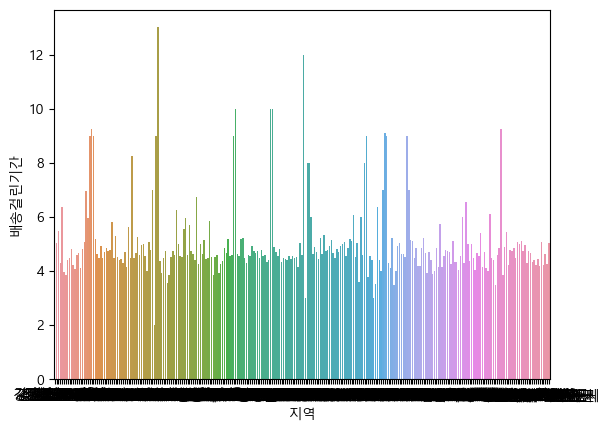

In [41]:
sns.barplot(data=dt1_days, x='지역', y='배송걸린기간')

In [42]:
dt1_late = dt1_days[dt1_days['배송걸린기간'] > 7]
dt1_late.sort_values(by='cnt', ascending=False)

,지역,배송걸린기간,택배배송,재고준비기간,cnt
19,경기 고양시,9.000000,7.403846,1.596154,52
179,세종특별자치시 연서면,9.111111,3.444444,5.666667,9
97,광주 북구,9.000000,7.833333,1.166667,6
242,충북 청주시,9.250000,8.250000,1.000000,4
20,경기 수원시,9.250000,8.750000,0.500000,4
42,경기도 연천군,8.250000,7.250000,1.000000,4
169,세종특별자치시 달빛로,9.000000,9.000000,0.000000,4
180,세종특별자치시 장군면,9.000000,8.000000,1.000000,3
98,광주 서구,10.000000,8.333333,1.666667,3
138,서울 용산구,8.000000,8.000000,0.000000,1


In [43]:
dt1_days.sort_values(by='cnt', ascending=False)

,지역,배송걸린기간,택배배송,재고준비기간,cnt
34,경기도 수원시,4.530558,3.294951,1.235607,1129
69,경상남도 창원시,4.510295,3.069830,1.440466,1117
60,경상남도 김해시,4.748603,3.141899,1.606704,895
57,경상남도 거제시,4.363636,3.030682,1.332955,880
44,경기도 용인시,4.681648,3.237203,1.444444,801
...,...,...,...,...,...
168,세종특별자치시 다솜1로,8.000000,7.000000,1.000000,1
173,세종특별자치시 만남로,3.000000,3.000000,0.000000,1
191,인천 부평구,9.000000,9.000000,0.000000,1
192,인천 중구,7.000000,7.000000,0.000000,1


In [44]:
def Age_MP(x):
    if 10<= x <20:
        return "10대"
    if 20<= x <30:
        return "20대"
    if 30<= x <40:
        return "30대"
    if 40<= x <50:
        return "40대"
    if 50<= x <60:
        return "50대"
    if 60<= x <70:
        return "60대"
    if 70<= x <80:
        return "70대"
    if 80<= x <90:
        return "80대"
    if 90<= x <100:
        return "90대"

dt2['나이대'] = dt2['나이'].apply(Age_MP)
dt2['나이대'] = dt2['나이대'].astype(str)

In [45]:
dt2_age2 = dt2.groupby(['나이대','유입경로'], as_index = False).agg(count = ('나이대', 'count'))
dt2_age2

,나이대,유입경로,count
0,20대,기타,17
1,20대,유튜브광고,260
2,20대,이메일광고,162
3,20대,인터넷검색,12
4,20대,잡지광고,39
5,20대,전단지광고,49
6,20대,지인추천,23
7,20대,카카오톡광고,76
8,30대,SNS광고,43
9,30대,기타,39


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '기타'),
  Text(1, 0, '유튜브광고'),
  Text(2, 0, '이메일광고'),
  Text(3, 0, '인터넷검색'),
  Text(4, 0, '잡지광고'),
  Text(5, 0, '전단지광고'),
  Text(6, 0, '지인추천'),
  Text(7, 0, '카카오톡광고'),
  Text(8, 0, 'SNS광고'),
  Text(9, 0, '신문광고'),
  Text(10, 0, '인터넷기사광고'),
  Text(11, 0, '블로그광고')])

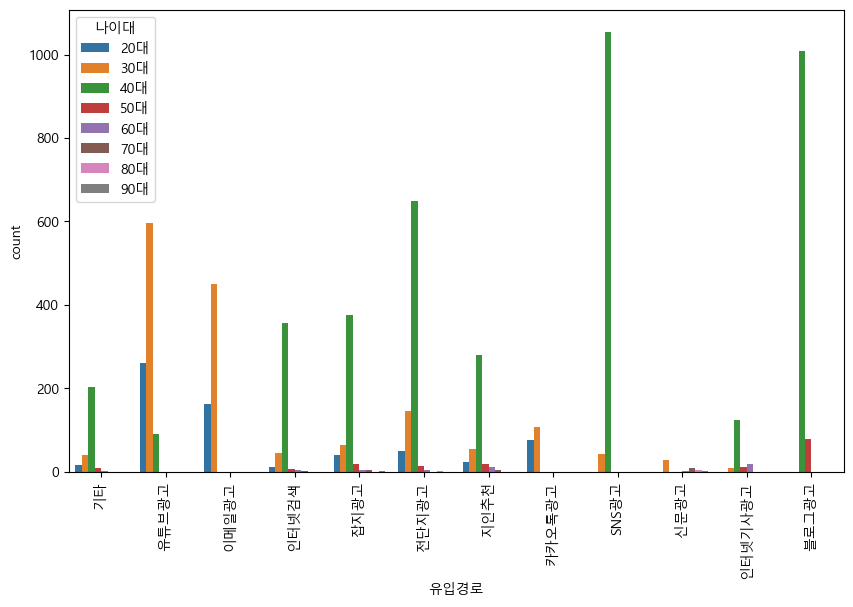

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(data=dt2_age2, x='유입경로', y='count', hue='나이대')
plt.xticks(rotation=90)

In [47]:
df.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', 'ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일',
       '유입경로', '유입기기', '회원 가입일', '사업자구분', '회원구분'],
      dtype='object')

In [48]:
df['주문일시'] = df['주문일시'].apply(lambda x:x.replace('오전', 'AM').replace('오후','PM'))

In [49]:
df['주문날짜'] = pd.to_datetime(df['주문일시'], format='%Y-%m-%d %p %I:%M')

In [50]:
df['주문날짜'] = df['주문날짜'].astype('str')
df['주문날짜'] = df['주문날짜'].apply(lambda x: x.split(' ')[0])

In [51]:
df['주문날짜'] = df['주문날짜'].astype('str')
df['주문날짜'].apply(lambda x: x[:7])
df['주문월'] = df['주문날짜'].apply(lambda x: x[:7])

In [52]:
df['주문월']

0        2018-12
1        2018-12
2        2018-12
3        2018-12
4        2018-12
          ...   
46744    2017-12
46745    2017-12
46746    2017-12
46747    2017-12
46748    2017-12
Name: 주문월, Length: 46749, dtype: object

In [53]:
def Age_MP(x):
    if 10<= x <20:
        return "10대"
    if 20<= x <30:
        return "20대"
    if 30<= x <40:
        return "30대"
    if 40<= x <50:
        return "40대"
    if 50<= x <60:
        return "50대"
    if 60<= x <70:
        return "60대"
    if 70<= x <80:
        return "70대"
    if 80<= x <90:
        return "80대"
    if 90<= x <100:
        return "90대"

df['나이대'] = df['나이'].apply(Age_MP)
df['나이대'] = df['나이대'].astype(str)

In [54]:
df.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', 'ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일',
       '유입경로', '유입기기', '회원 가입일', '사업자구분', '회원구분', '주문날짜', '주문월', '나이대'],
      dtype='object')

In [55]:
df_ages_price = df.groupby(['나이대','주문월'])[['상품구매금액']].median().reset_index()

In [56]:
df_ages_price['주문월'] = pd.to_datetime(df_ages_price['주문월'], format='%Y-%m')

<AxesSubplot: xlabel='주문월', ylabel='상품구매금액'>

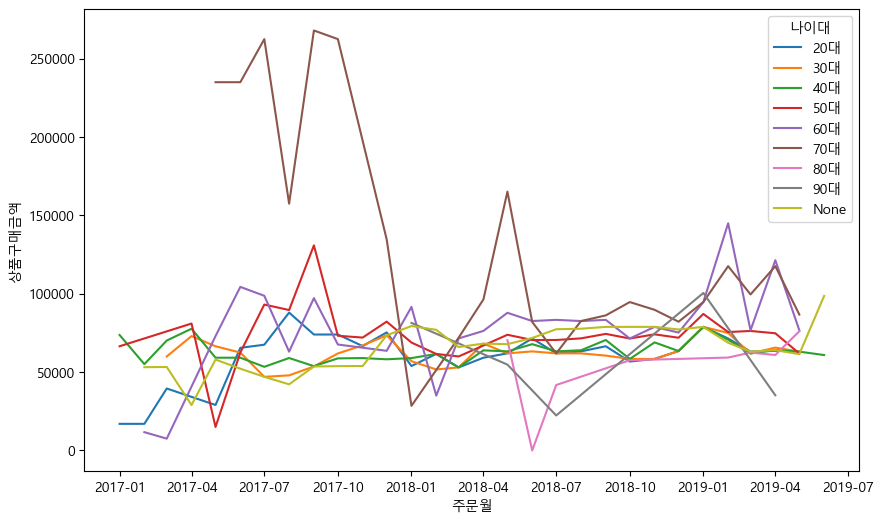

In [57]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ages_price, x='주문월',y='상품구매금액',hue='나이대')

In [58]:
px.line(df_ages_price, x='주문월',y='상품구매금액',color='나이대')

In [59]:
dt1.columns

Index(['결제수단', '공급원가', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', '배송걸린기간', '택배배송', '재고준비기간', '지역'],
      dtype='object')

In [60]:
dt1_ages = dt1.merge(dt2[['ID','나이대']], how='left', left_on='주문자ID', right_on='ID')

In [61]:
dt1_ages.columns

Index(['결제수단', '공급원가', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', '배송걸린기간', '택배배송', '재고준비기간', '지역', 'ID', '나이대'],
      dtype='object')

In [62]:
dt1_ages['주문일시']

0       2018-12-27 14:54:00
1       2018-12-29 13:22:00
2       2018-12-30 15:15:00
3       2018-12-31 10:30:00
4       2018-12-31 10:43:00
                ...        
46744   2017-12-29 13:39:00
46745   2017-12-29 17:16:00
46746   2017-12-30 18:56:00
46747   2017-12-31 10:00:00
46748   2017-12-31 18:15:00
Name: 주문일시, Length: 46749, dtype: datetime64[ns]

In [63]:
dt1_ages['주문날짜'] = pd.to_datetime(dt1_ages['주문일시'], format='%Y-%m-%d %H:%M:%S')
dt1_ages['주문날짜'] = dt1_ages['주문날짜'].astype('str')
dt1_ages['주문날짜'] = dt1_ages['주문날짜'].apply(lambda x: x.split(' ')[0])


In [64]:
dt1_ages['주문날짜'] = dt1_ages['주문날짜'].astype('str')
dt1_ages['주문날짜'].apply(lambda x: x[:7])
dt1_ages['주문월'] = dt1_ages['주문날짜'].apply(lambda x: x[:7])

In [65]:
dt1_ages['주문월'] = pd.to_datetime(dt1_ages['주문월'], format='%Y-%m')

In [66]:
dt1_ages_month_price = dt1_ages.groupby(['나이대','주문월','상품구매금액'])[['ID']].count().reset_index()

In [67]:
dt1_ages_month_price

,나이대,주문월,상품구매금액,ID
0,20대,2017-01-01,17000,2
1,20대,2017-02-01,17000,1
2,20대,2017-03-01,21500,1
3,20대,2017-03-01,57600,1
4,20대,2017-05-01,28210,1
...,...,...,...,...
9225,90대,2018-07-01,0,1
9226,90대,2018-07-01,44700,1
9227,90대,2019-01-01,60280,1
9228,90대,2019-01-01,140750,1


In [68]:
px.bar(dt1_ages_month_price, x='주문월',y='ID',color='나이대')

In [69]:
px.bar(dt1_ages_month_price, x='주문월',y='상품구매금액',color='나이대')

In [70]:
dt1.columns

Index(['결제수단', '공급원가', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', '배송걸린기간', '택배배송', '재고준비기간', '지역'],
      dtype='object')

In [71]:
dt1['수령인_도시'] = dt1['수령인 주소'].dropna().apply(lambda x: x.split(' ')[0])

In [72]:
dt1['수령인_도시'].unique()

array(['경상남도', '서울특별시', '세종특별자치시', '부산광역시', '대구광역시', '경상북도', '충청남도',
       '전라남도', '경기도', '전라북도', '충청북도', '강원도', '울산광역시', '광주광역시', '인천광역시',
       '대전광역시', '제주특별자치도', '경기', '충북', '광주', nan, '경남', '서울', '강원', '인천',
       '부산', '경북'], dtype=object)

In [73]:
dt1['수령인_도시'] = dt1['수령인_도시'].replace('충북','충청북도').replace('경기','경기도').replace('광주','광주광역시').replace('서울','서울특별시').replace('경남','경상남도').replace('강원','강원도').replace('인천','인천광역시').replace('부산','부산광역시').replace('경북','경상북도')

In [74]:
dt1_city_price = dt1.groupby('수령인_도시', as_index=False)[['상품구매금액']].sum().sort_values(by='상품구매금액', ascending=False)
dt1_city_price

,수령인_도시,상품구매금액
1,경기도,598411720
8,서울특별시,393960350
7,부산광역시,362212910
2,경상남도,335409590
3,경상북도,216292860
5,대구광역시,169127210
0,강원도,140567400
15,충청남도,137290230
16,충청북도,137189190
13,전라북도,132597800


<AxesSubplot: xlabel='상품구매금액', ylabel='수령인_도시'>

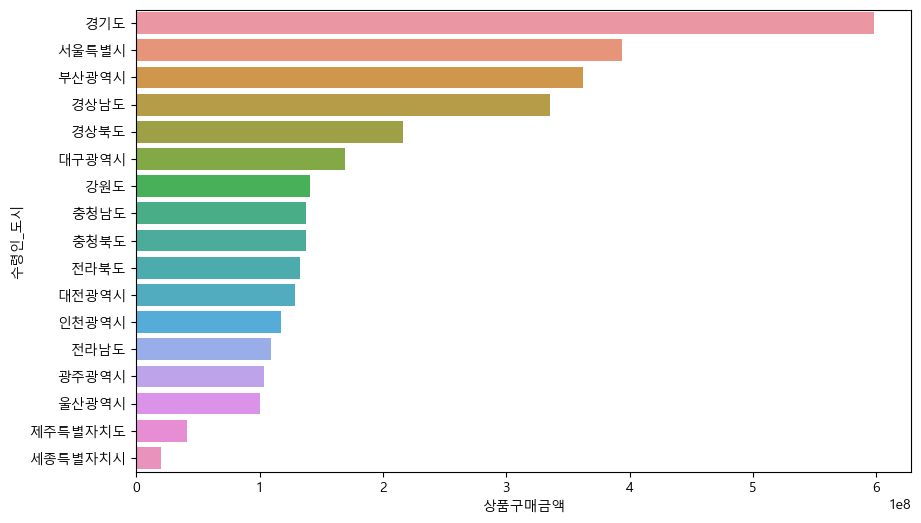

In [75]:
plt.figure(figsize=(10,6))
sns.barplot(data=dt1_city_price, x = '상품구매금액', y = '수령인_도시')

In [76]:
import os 
import json

In [77]:
root_path = os.getcwd() # 실행 코드가 있는 곳 
data_path = os.path.join(root_path, 'data') # 실험에 쓰일 데이터가 있는 곳 
os.chdir(data_path)

In [78]:
geometry_gj = json.load(open('kor_city.geojson', encoding='utf-8'))

In [79]:
dt1_map = dt1_city_price.copy()

In [80]:
dt1_map = dt1_map.rename(columns={'수령인_도시' : 'CTP_KOR_NM'})

In [108]:
dt1_map

,CTP_KOR_NM,상품구매금액
1,경기도,598411720
8,서울특별시,393960350
7,부산광역시,362212910
2,경상남도,335409590
3,경상북도,216292860
5,대구광역시,169127210
0,강원도,140567400
15,충청남도,137290230
16,충청북도,137189190
13,전라북도,132597800


In [81]:
geometry_gj

{'type': 'FeatureCollection',
 'bbox': [124.7893155286271,
  33.172610584346295,
  130.96524575425667,
  38.54255349620522],
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[128.54880989370014, 38.301950820518755],
      [128.5600921732829, 38.25735515107489],
      [128.59761716763322, 38.21480959198724],
      [128.60765942875406, 38.15215810015938],
      [128.64206854447866, 38.106588627599855],
      [128.66939445927846, 38.08634208760778],
      [128.69458333244307, 38.0453480455091],
      [128.73326744935343, 38.01787054352603],
      [128.79463671088126, 37.92801060958252],
      [128.8233689458956, 37.90753318801803],
      [128.83001997197184, 37.88458455426084],
      [128.8786226699225, 37.8294251483049],
      [128.9852771172376, 37.74045442473868],
      [129.01482411622038, 37.70600771921262],
      [129.05505018456222, 37.675224044111836],
      [129.04353313092116, 37.642745963305245],
      [129.05392180246835, 37.62123228307

In [82]:
fig = px.choropleth(dt1_map, geojson=geometry_gj, locations='CTP_KOR_NM', color = '상품구매금액', color_continuous_scale='Blues',featureidkey='properties.CTP_KOR_NM')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text='도시별 구매액', title_font_size=20)
fig.update_layout(
        autosize=False,
        margin = dict(
                l=0,
                r=0,
                b=0,
                t=0,
                pad=4,
                autoexpand=True
            ),
            width=800,
             height=400,
    )

In [83]:
dt1['수령인_도시'].unique()

array(['경상남도', '서울특별시', '세종특별자치시', '부산광역시', '대구광역시', '경상북도', '충청남도',
       '전라남도', '경기도', '전라북도', '충청북도', '강원도', '울산광역시', '광주광역시', '인천광역시',
       '대전광역시', '제주특별자치도', nan], dtype=object)

In [84]:
dt1['지역'] = dt1['지역'].replace('경기 수원시', '경기도 수원시').replace('경기 포천시', '경기도 포천시').replace('경기 고양시', '경기도 고양시')

In [85]:
dt1_gyeonggi=dt1[dt1['수령인_도시'].str.contains('경기도', na=False)]

In [86]:
dt1_gyeonggi_price = dt1_gyeonggi.groupby('지역', as_index=False)[['상품구매금액']].sum().sort_values(by='상품구매금액', ascending=False)

<AxesSubplot: xlabel='상품구매금액', ylabel='지역'>

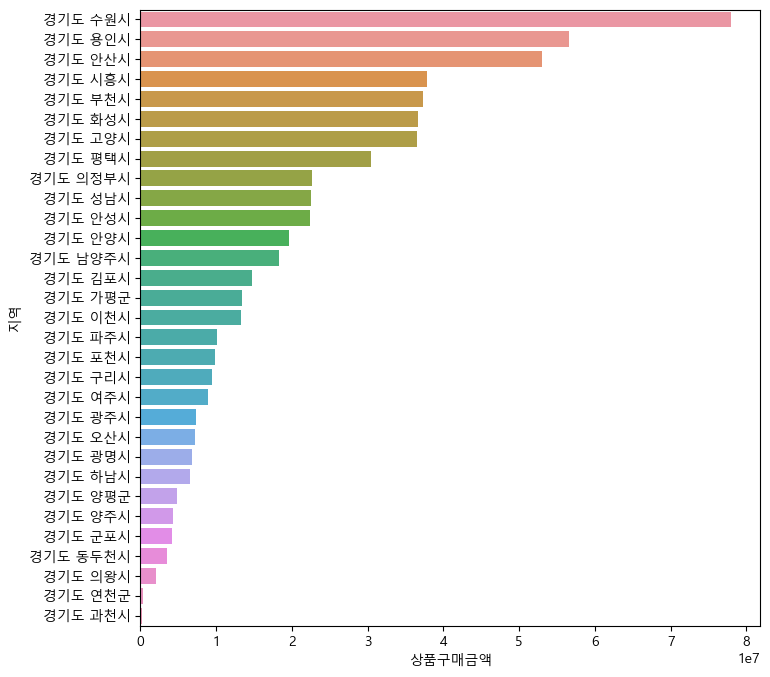

In [87]:
plt.figure(figsize=(8,8))
sns.barplot(data=dt1_gyeonggi_price, x='상품구매금액',y='지역')

In [88]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   결제수단        46749 non-null  object        
 1   공급원가        46661 non-null  float64       
 2   네이버 포인트     46749 non-null  int64         
 3   배송번호        46749 non-null  object        
 4   배송비 정보      46749 non-null  object        
 5   배송시작일       46749 non-null  datetime64[ns]
 6   배송완료일       46749 non-null  datetime64[ns]
 7   사용한 적립금액    46749 non-null  int64         
 8   상품구매금액      46749 non-null  int64         
 9   상품명         46661 non-null  object        
 10  상품번호        46661 non-null  float64       
 11  상품별 추가할인금액  46749 non-null  int64         
 12  수량          46749 non-null  int64         
 13  수령인 주소      46741 non-null  object        
 14  주문 시 회원등급   43644 non-null  object        
 15  주문경로        46749 non-null  object        
 16  주문번호        46749 non-

In [89]:
dt1['주문날짜'] = pd.to_datetime(dt1['주문일시'], format='%Y-%m-%d %H:%M:%S')
dt1['주문날짜'] = dt1['주문날짜'].astype('str')
dt1['주문날짜'] = dt1['주문날짜'].apply(lambda x: x.split(' ')[0])

In [90]:
dt1['주문날짜'] = pd.to_datetime(dt1['주문날짜'], format='%Y-%m-%d')

In [91]:
dt1.head()

,결제수단,공급원가,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,...,카드사,쿠폰 할인금액,판매가,품목번호,배송걸린기간,택배배송,재고준비기간,지역,수령인_도시,주문날짜
0,무통장입금,44550.0,0,D-20181227-0000648-00,무료,2019-01-07 08:56:00,2019-01-11 05:32:00,0,71450,195파이 탕용기 소 300개 1set(2박스),...,NaN,0,71450,42602,14,3,11,경상남도 거제시,경상남도,2018-12-27
1,무통장입금,44000.0,0,D-20181229-0000119-00,무료,2019-01-03 09:30:00,2019-01-07 05:32:00,0,141240,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",...,NaN,0,70620,42930,8,3,5,서울특별시 동대문구,서울특별시,2018-12-29
2,무통장입금,6820.0,0,D-20181230-0000100-00,무료,2019-01-03 09:30:00,2019-01-07 05:32:00,0,13910,비닐봉투 배달중 중 백색 200개,...,NaN,0,13910,42998,7,3,4,세종특별자치시 호려울로,세종특별자치시,2018-12-30
3,무통장입금,49500.0,0,D-20181231-0000087-00,무료,2019-01-03 09:30:00,2019-01-07 05:32:00,0,81600,195파이 미니탕용기 투톤 300개 1set(2박스),...,NaN,0,81600,43063,6,3,3,부산광역시 부산진구,부산광역시,2018-12-31
4,무통장입금,61600.0,0,D-20181231-0000108-00,무료,2019-01-07 08:56:00,2019-01-11 05:32:00,0,94710,250파이 원형 접시 미니 블랙 400개 1박스,...,NaN,0,94710,43066,10,3,7,부산광역시 해운대구,부산광역시,2018-12-31


### for 반복문 이용시도

In [92]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   결제수단        46749 non-null  object        
 1   공급원가        46661 non-null  float64       
 2   네이버 포인트     46749 non-null  int64         
 3   배송번호        46749 non-null  object        
 4   배송비 정보      46749 non-null  object        
 5   배송시작일       46749 non-null  datetime64[ns]
 6   배송완료일       46749 non-null  datetime64[ns]
 7   사용한 적립금액    46749 non-null  int64         
 8   상품구매금액      46749 non-null  int64         
 9   상품명         46661 non-null  object        
 10  상품번호        46661 non-null  float64       
 11  상품별 추가할인금액  46749 non-null  int64         
 12  수량          46749 non-null  int64         
 13  수령인 주소      46741 non-null  object        
 14  주문 시 회원등급   43644 non-null  object        
 15  주문경로        46749 non-null  object        
 16  주문번호        46749 non-

In [93]:
dt1_find=dt1.groupby(['주문자ID', '주문일시'], as_index=False)[['결제수단']].count()
dt1_find=dt1_find[dt1_find['결제수단'] > 2]
dt1_find.sort_values(by='주문일시', ascending=False)
dt1_find

,주문자ID,주문일시,결제수단
1,1003409866@k,2019-01-07 20:34:00,4
5,1003409866@k,2019-02-11 10:45:00,3
7,1003409866@k,2019-02-26 10:27:00,3
8,1003409866@k,2019-03-05 15:16:00,5
17,1003409866@k,2019-05-01 21:29:00,3
...,...,...,...
21320,zlxm777,2019-04-17 17:31:00,3
21326,zuingong73,2018-10-22 16:06:00,3
21333,zxxz60,2019-05-07 15:09:00,5
21356,zzbbwmf,2018-10-17 17:07:00,5


In [94]:
dt1_find['주문일시'].iloc[1] - dt1_find['주문일시'].iloc[0]

Timedelta('34 days 14:11:00')

In [95]:
dt1_id_days = dt1_find.groupby('주문자ID', as_index=False)[['주문일시']].count().sort_values(by='주문일시', ascending=False)
dt1_id_days[dt1_id_days['주문일시'] > 1]

,주문자ID,주문일시
1355,pp257,49
229,776646558@k,48
893,mission1013,41
72,20754614@n,37
821,leemansome,36
...,...,...
1253,pp1560,2
1255,pp1565,2
1028,pp057,2
290,a01053972651,2


In [96]:
dt1_find.iloc[0, 0] == dt1_find.iloc[1, 0]

True

In [97]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   결제수단        46749 non-null  object        
 1   공급원가        46661 non-null  float64       
 2   네이버 포인트     46749 non-null  int64         
 3   배송번호        46749 non-null  object        
 4   배송비 정보      46749 non-null  object        
 5   배송시작일       46749 non-null  datetime64[ns]
 6   배송완료일       46749 non-null  datetime64[ns]
 7   사용한 적립금액    46749 non-null  int64         
 8   상품구매금액      46749 non-null  int64         
 9   상품명         46661 non-null  object        
 10  상품번호        46661 non-null  float64       
 11  상품별 추가할인금액  46749 non-null  int64         
 12  수량          46749 non-null  int64         
 13  수령인 주소      46741 non-null  object        
 14  주문 시 회원등급   43644 non-null  object        
 15  주문경로        46749 non-null  object        
 16  주문번호        46749 non-

In [98]:
dt1_find['주문일시']

1       2019-01-07 20:34:00
5       2019-02-11 10:45:00
7       2019-02-26 10:27:00
8       2019-03-05 15:16:00
17      2019-05-01 21:29:00
                ...        
21320   2019-04-17 17:31:00
21326   2018-10-22 16:06:00
21333   2019-05-07 15:09:00
21356   2018-10-17 17:07:00
21363   2018-01-03 14:00:00
Name: 주문일시, Length: 5100, dtype: datetime64[ns]

In [99]:
dt1_find=dt1_find.sort_values(by='주문자ID')
dt1_find['주문일시'] = dt1_find['주문일시'].dt.strftime('%Y-%m-%d')

In [107]:
dt1_find['주문일시'] = pd.to_datetime(dt1_find['주문일시'], format='%Y-%m-%d')
dt1_find['주문일시']=dt1_find['주문일시'].sort_values()
dt1_find

,주문자ID,주문일시,결제수단
1,1003409866@k,2019-01-07,4
5,1003409866@k,2019-02-11,3
7,1003409866@k,2019-02-26,3
8,1003409866@k,2019-03-05,5
17,1003409866@k,2019-05-01,3
...,...,...,...
21320,zlxm777,2019-04-17,3
21326,zuingong73,2018-10-22,3
21333,zxxz60,2019-05-07,5
21356,zzbbwmf,2018-10-17,5


In [161]:
dt1_remove = dt1_find.groupby('주문자ID', as_index=False)[['주문일시']].count()
dt1_remove=dt1_remove[dt1_remove['주문일시'] > 1]
dt1_remove=dt1_remove.sort_values(by = '주문자ID')
dt1_remove = dt1_remove.reset_index()
dt1_remove

,index,주문자ID,주문일시
0,0,1003409866@k,6
1,4,10320819@n,5
2,12,109319048@n,3
3,13,111681891@n,2
4,14,112549561@n,2
...,...,...,...
791,2051,ywg9669,2
792,2055,zagm10,18
793,2056,zasm2925,2
794,2057,zhuiqiu,2


In [144]:
n = 0
list1 = list()
list2 = list()

while True:
    
    if dt1_find.iloc[n, 0] == dt1_find.iloc[n+1, 0]:
        list2.append(dt1_find['주문일시'].iloc[n+1] - dt1_find['주문일시'].iloc[n])
        n += 1
        continue
    
    elif dt1_find.iloc[n, 0] != dt1_find.iloc[n+1, 0]:
        list1.append(list2)
        list2 = list()
    
    

    if n == len(dt1_find)-2:
        break

    n += 1

In [145]:
list1 = list(filter(None, list1))
len(list1)

796

In [146]:
list1

[[Timedelta('35 days 00:00:00'),
  Timedelta('15 days 00:00:00'),
  Timedelta('7 days 00:00:00'),
  Timedelta('57 days 00:00:00'),
  Timedelta('27 days 00:00:00')],
 [Timedelta('-35 days +00:00:00'),
  Timedelta('-62 days +00:00:00'),
  Timedelta('-161 days +00:00:00'),
  Timedelta('174 days 00:00:00')],
 [Timedelta('-363 days +00:00:00'), Timedelta('188 days 00:00:00')],
 [Timedelta('187 days 00:00:00')],
 [Timedelta('165 days 00:00:00')],
 [Timedelta('-72 days +00:00:00')],
 [Timedelta('-453 days +00:00:00'), Timedelta('180 days 00:00:00')],
 [Timedelta('128 days 00:00:00'),
  Timedelta('62 days 00:00:00'),
  Timedelta('127 days 00:00:00')],
 [Timedelta('13 days 00:00:00'),
  Timedelta('21 days 00:00:00'),
  Timedelta('23 days 00:00:00'),
  Timedelta('16 days 00:00:00'),
  Timedelta('23 days 00:00:00')],
 [Timedelta('-314 days +00:00:00')],
 [Timedelta('7 days 00:00:00'),
  Timedelta('14 days 00:00:00'),
  Timedelta('6 days 00:00:00'),
  Timedelta('8 days 00:00:00'),
  Timedelta('12 

In [147]:
list1[0][0] + list1[0][1]

Timedelta('50 days 00:00:00')

In [148]:
from datetime import timedelta

In [149]:
n = timedelta(days=0)
days_mean = []

for i in range(len(list1)):
    for j in range(len(list1[i])):
        n += list1[i][j]
    days_mean.append(n)
    n = timedelta(days=0)

In [151]:
len(days_mean)

796

In [187]:
sum_days = pd.DataFrame(data = days_mean)

In [188]:
sum_days.columns = ['days']

In [189]:
sum_days['days'] = sum_days['days'].abs()
sum_days['주문자ID'] = dt1_remove['주문자ID']
sum_days

,days,주문자ID
0,141 days,1003409866@k
1,84 days,10320819@n
2,175 days,109319048@n
3,187 days,111681891@n
4,165 days,112549561@n
...,...,...
791,193 days,ywg9669
792,132 days,zagm10
793,349 days,zasm2925
794,46 days,zhuiqiu


In [270]:
dt_reg1 = dt1.copy()

In [271]:
dt_reg1 = dt_reg1.merge(sum_days, how='left', on='주문자ID')


In [272]:
dt_reg1 = dt_reg1[dt_reg1['days'].notna()]
dt_reg1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24481 entries, 0 to 46745
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   결제수단        24481 non-null  object         
 1   공급원가        24474 non-null  float64        
 2   네이버 포인트     24481 non-null  int64          
 3   배송번호        24481 non-null  object         
 4   배송비 정보      24481 non-null  object         
 5   배송시작일       24481 non-null  datetime64[ns] 
 6   배송완료일       24481 non-null  datetime64[ns] 
 7   사용한 적립금액    24481 non-null  int64          
 8   상품구매금액      24481 non-null  int64          
 9   상품명         24474 non-null  object         
 10  상품번호        24474 non-null  float64        
 11  상품별 추가할인금액  24481 non-null  int64          
 12  수량          24481 non-null  int64          
 13  수령인 주소      24481 non-null  object         
 14  주문 시 회원등급   24481 non-null  object         
 15  주문경로        24481 non-null  object         
 16  주문번호

In [273]:
dt_reg1 = dt_reg1.drop(['상품명','지역','배송번호','배송시작일','배송완료일','상품번호','수령인 주소','주문번호','주문일시','주문자ID','품목번호','수령인_도시','주문날짜'], axis=1)

In [208]:
dt_reg1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24481 entries, 0 to 46745
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   결제수단        24481 non-null  category       
 1   공급원가        24474 non-null  float64        
 2   네이버 포인트     24481 non-null  int64          
 3   배송비 정보      24481 non-null  category       
 4   사용한 적립금액    24481 non-null  int64          
 5   상품구매금액      24481 non-null  int64          
 6   상품명         24474 non-null  category       
 7   상품별 추가할인금액  24481 non-null  int64          
 8   수량          24481 non-null  int64          
 9   주문 시 회원등급   24481 non-null  category       
 10  주문경로        24481 non-null  category       
 11  카드사         7338 non-null   category       
 12  쿠폰 할인금액     24481 non-null  int64          
 13  판매가         24481 non-null  int64          
 14  배송걸린기간      24481 non-null  int32          
 15  택배배송        24481 non-null  int32          
 16  재고준비

In [274]:
dt_reg1['days'] = dt_reg1['days'].dt.days

In [275]:
dt_reg1['배송비 정보'] = dt_reg1['배송비 정보'].astype('category')
dt_reg1['결제수단'] = dt_reg1['결제수단'].astype('category')
dt_reg1['주문 시 회원등급'] = dt_reg1['주문 시 회원등급'].astype('category')
dt_reg1['주문경로'] = dt_reg1['주문경로'].astype('category')
dt_reg1['카드사'] = dt_reg1['카드사'].astype('category')

In [276]:
dt_reg1 = dt_reg1[dt_reg1['공급원가'].notna()]

In [277]:
dt_reg1.columns = dt_reg1.columns.str.replace(' ','')

In [258]:
dt_reg1.columns

Index(['결제수단', '공급원가', '네이버포인트', '배송비정보', '사용한적립금액', '상품구매금액', '상품명',
       '상품별추가할인금액', '수량', '주문시회원등급', '주문경로', '카드사', '쿠폰할인금액', '판매가', '배송걸린기간',
       '택배배송', '재고준비기간', '지역', 'days'],
      dtype='object')

In [278]:
dt_reg01 = pd.get_dummies(dt_reg1.loc[:, ~dt_reg1.columns.isin(['days'])], dummy_na=True)

In [234]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [279]:
y = dt_reg1['days']
x = dt_reg01

In [280]:
x.columns = x.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))

In [281]:
x_tn, x_ts, y_tn, y_ts = train_test_split(x, y, test_size=0.3)

In [218]:
std = StandardScaler()
std.fit(x_tn)

std_x_tn = std.transform(x_tn)
std_x_ts = std.transform(x_ts)

In [282]:
reg = LinearRegression()
reg.fit(x_tn, y_tn)

pred_y = reg.predict(x_ts)

In [283]:
import statsmodels.api as sm

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   days   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     16.79
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          5.81e-195
Time:                        23:09:11   Log-Likelihood:            -1.4613e+05
No. Observations:               24474   AIC:                         2.924e+05
Df Residuals:                   24403   BIC:                         2.930e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
공급원가                      0.00

In [284]:
reg02 = xgb.XGBRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 100)
reg02.fit(x_tn, y_tn)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

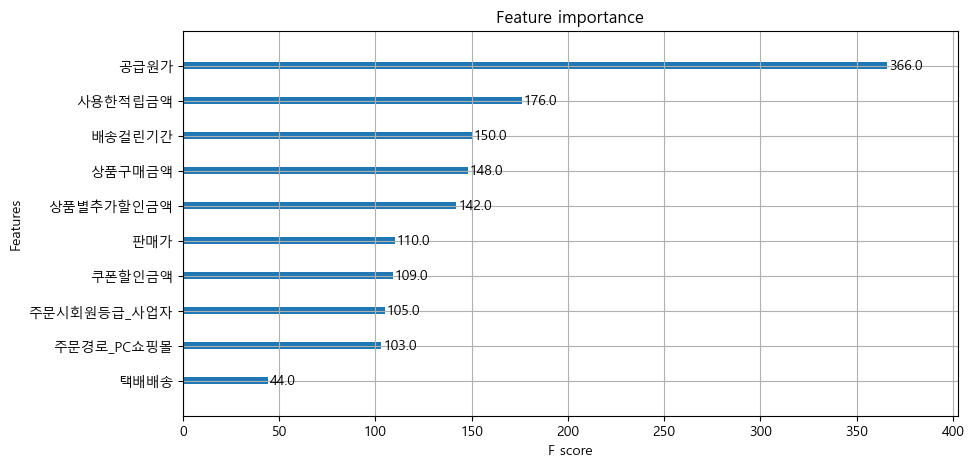

In [297]:
fig, ax = plt.subplots(figsize = (10, 5))
xgb.plot_importance(reg02, ax=ax, max_num_features=10)
